In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('final_final_data.csv', index_col=0)

In [3]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [4]:
df.price.describe()

count    46366.000000
mean       135.691816
std        130.749525
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

In [5]:
dropped_df = df[df['price']<160]
dropped_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
1,0,1,1,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,1,0,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,0,1,1,1,1.0,1.0,75.0,1,0,0,118,0,0,0,1,0,1,0,171,11.0,4.317488,2.289935,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
6,1,1,1,2,1.0,1.0,140.0,1,9,9,161,0,0,0,4,2,0,2,168,11.0,4.941642,7.800726,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [6]:
df.price.describe()

count    46366.000000
mean       135.691816
std        130.749525
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

In [7]:
features = list(df.columns) 

In [8]:
features.remove('price')
features.remove('log_price')


In [9]:
features

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Airconditioning',
 'BBQgrill',
 'Bathtub',
 'Beachessentials',
 'Beachfront',
 'Bedlinens',
 'Breakfast',
 'Buildingstaff',
 'CableTV',
 'Changingtable',
 'Cleaningbeforecheckout',
 'Coffeemaker',
 'Cookingbasics',
 'Crib',
 'Dishesandsilverware',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'E

In [10]:
target = dropped_df['price']

# Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(dropped_df[features], target)

#access output
#print(lm.intercept_)
#print(lm.coef_)
print("R^2: ", lm.score(dropped_df[features], target))

R^2:  0.4878495343862858


In [12]:
X_train, X_test, y_train, y_test = train_test_split(dropped_df[features], target, random_state=9,test_size=0.2)

In [13]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=dropped_df[features].columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=dropped_df[features].columns)

In [14]:
#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 25.417101080924976


In [15]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('R SQUARED:', lm.score(X_test, y_test))
print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 25.305513330167244
R SQUARED: 0.4818498898159216
Training:  25.417101080924976 vs. Testing:  25.305513330167244


In [16]:
X_train

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,-0.498782,0.055139,0.558109,-1.052259,-0.310347,-0.389957,0.019927,-0.793134,-0.854027,-0.494265,-0.486407,-0.21623,-0.729524,-0.250941,-0.198030,-0.146240,-0.110035,-1.429535,0.058666,-0.059121,0.254758,1.926316,-0.224081,0.746206,-0.597676,1.161703,-0.526232,1.109001,0.043358,0.718293,-0.650781,-0.035048,-0.030049,-0.3833,-0.028187,0.466209,-0.16003,-0.270384,-0.079258,-0.042514,-0.672880,-0.288912,-0.144654,2.107968,-0.054476,-0.199914,-0.689742,-0.747613,-0.108594,-0.850178,-0.382123,1.354655,1.908210,0.309949,-0.530814,-0.765834,-0.050681,1.404018,-0.266055,-0.764470,-0.277010,-0.265511,-1.269343,-1.671904,-0.408068,-0.178636,-1.123268,-0.166781,-1.216060,-0.215602,0.326725,-0.044593,-0.675938,-0.349327,-0.487643,-0.432499,-0.753546,-0.721008,-0.1509,-0.267297,-0.111615,-0.088837,-0.490022,-0.314474,-0.868133,-1.312058,-0.250718,-0.202051,0.385279,-0.056761,-0.746440,-1.317063,1.327577,-0.082201,0.176147,-0.162504,-0.061375,0.864686,-0.165635,-0.875955,1.283216,-0.419076,-0.092875
1,-0.498782,0.055139,0.558109,-0.264734,-0.310347,-0.389957,0.019927,-0.793134,-0.854027,-0.412311,-0.137855,-0.21623,-0.729524,-0.250941,-0.198030,-0.146240,-0.110035,1.104443,1.256464,0.182109,0.254758,-0.519126,-0.224081,0.746206,-0.597676,-0.860805,1.900302,1.109001,0.043358,0.718293,-0.650781,-0.035048,-0.030049,-0.3833,-0.028187,0.466209,-0.16003,-0.270384,-0.079258,-0.042514,1.486148,-0.288912,-0.144654,-0.474391,-0.054476,-0.199914,1.449817,1.337591,-0.108594,1.176224,2.616961,-0.738195,1.908210,0.309949,-0.530814,-0.765834,-0.050681,1.404018,-0.266055,1.308095,-0.277010,3.766325,0.787809,0.598121,2.450573,-0.178636,0.890259,-0.166781,-1.216060,-0.215602,0.326725,-0.044593,-0.675938,-0.349327,-0.487643,-0.432499,1.327058,1.386947,-0.1509,-0.267297,-0.111615,-0.088837,-0.490022,-0.314474,1.151898,0.762161,-0.250718,-0.202051,0.385279,-0.056761,1.339693,-1.317063,-0.753252,-0.082201,0.176147,-0.162504,-0.061375,0.864686,-0.165635,1.141611,-0.779292,-0.419076,-0.092875
2,-0.498782,0.055139,0.558109,-0.264734,-0.310347,-0.389957,0.019927,-0.793134,-0.854027,-0.494265,-0.486407,-0.21623,-0.729524,-0.250941,-0.198030,-0.146240,-0.110035,-0.423396,-0.340600,0.019428,0.254758,-0.519126,-0.224081,0.746206,1.673148,1.161703,-0.526232,-0.901712,0.043358,0.718293,1.536616,-0.035048,-0.030049,-0.3833,-0.028187,0.466209,-0.16003,-0.270384,-0.079258,-0.042514,-0.672880,-0.288912,-0.144654,-0.474391,-0.054476,-0.199914,-0.689742,-0.747613,-0.108594,-0.850178,-0.382123,-0.738195,1.908210,0.309949,-0.530814,-0.765834,-0.050681,1.404018,-0.266055,-0.764470,-0.277010,-0.265511,-1.269343,-1.671904,-0.

In [17]:
# homoscedistic

In [18]:
# check for multicollinearity

In [19]:
('calculated_host_listings_count', -173.4468141114573),
('calculated_host_listings_count_entire_homes', 154.8477833087655),

(('calculated_host_listings_count_entire_homes', 154.8477833087655),)

In [20]:
lm.coef_[35]

1.555929931715725

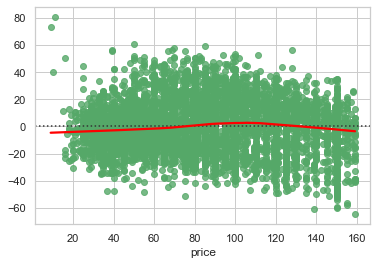

In [21]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g", line_kws={"color": "red"});

In [22]:
# When the price is 160, the lowest point on 160, one time i predicted my model was off by -60,
# few times at price 160, i was off by 40. At price 80 is where I am most accurate 



In [23]:
#Residual Plot above shows that as the price gets higher it gets harder to predict, and our model tends to underestimate 

### Linear Model w/ Log Target Variable

In [24]:
y_log = np.log(y_train)
y_log

9083     4.077537
40177    4.418841
13071    4.234107
5087     4.905275
38984    5.010635
           ...   
34535    4.094345
7222     4.828314
30242    4.158883
725      4.317488
27820    4.174387
Name: price, Length: 27713, dtype: float64

In [25]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
log_train_pred

array([4.2320426 , 4.17359003, 4.32010356, ..., 4.64583242, 4.33413438,
       3.91151983])

In [26]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)
y_train_pred

array([ 68.85773732,  64.94819974,  75.1964152 , ..., 104.15002599,
        76.25891889,  49.97484749])

In [27]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 88.10532872017372


In [28]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 26.095852534080738


In [29]:
y_test_pred = lm_log.predict(X_test)

#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 26.095852534080738
Training:  88.10532872017372 vs. Testing:  26.095852534080738


# Polynomial Model

In [30]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)

In [31]:
poly_data = poly.fit_transform(dropped_df[features])

In [32]:
poly_columns = poly.get_feature_names(dropped_df[features].columns)

In [33]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [34]:
df_poly.head()


,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland,host_is_superhost host_has_profile_pic,host_is_superhost host_identity_verified,host_is_superhost accommodates,host_is_superhost bedrooms,host_is_superhost beds,host_is_superhost has_availability,host_is_superhost availability_30,host_is_superhost availability_60,host_is_superhost number_of_reviews,host_is_superhost number_of_reviews_ltm,host_is_superhost number_of_reviews_l30d,host_is_superhost instant_bookable,host_is_superhost calculated_host_listings_count,host_is_superhost calculated_host_listings_count_entire_homes,host_is_superhost calculated_host_listings_count_private_rooms,host_is_superhost calculated_host_listings_count_shared_rooms,host_is_superhost description_count,host_is_superhost host_since_year,host_is_superhost dist_diff,host_is_superhost email,host_is_superhost facebook,host_is_superhost google,host_is_superhost government_id,host_is_superhost identity_manual,host_is_superhost jumio,host_is_superhost kba,host_is_superhost offline_government_id,host_is_superhost phone,host_is_superhost reviews,host_is_superhost selfie,host_is_superhost sent_id,host_is_superhost weibo,host_is_superhost work_email,host_is_superhost zhima_selfie,host_is_superhost Airconditioning,host_is_superhost BBQgrill,host_is_superhost Bathtub,host_is_superhost Beachessentials,host_is_superhost Beachfront,host_is_superhost Bedlinens,host_is_superhost Breakfast,host_is_superhost Buildingstaff,host_is_superhost CableTV,host_is_superhost Changingtable,host_is_superhost Cleaningbeforecheckout,host_is_superhost Coffeemaker,host_is_superhost Cookingbasics,...,Shampoo Stairgates,Shampoo Stove,Shampoo TV,Shampoo Washer,Shampoo Waterfront,Shampoo Wifi,Shampoo Windowguards,Shampoo hotel_room,Shampoo private_room,Shampoo shared_room,Shampoo Brooklyn,Shampoo Manhattan,Shampoo Queens,Shampoo StatenIsland,Showergel Singlelevelhome,Showergel Smokealarm,Showergel Stairgates,Showergel Stove,Showergel TV,Showergel Washer,Showergel Waterfront,Showergel Wifi,Showergel Windowguards,Showergel hotel_room,Showergel private_room,Showergel shared_room,Showergel Brooklyn,Showergel Manhattan,Showergel Queens,Showergel StatenIsland,Singlelevelhome Smokealarm,Singlelevelhome Stairgates,Singlelevelhome Stove,Singlelevelhome TV,Singlelevelhome Washer,Singlelevelhome Waterfront,Singlelevelhome Wifi,Singlelevelhome Windowguards,Singlelevelhome hotel_room,Singlelevelhome private_room,Singlelevelhome shared_room,Singlelevelhome Brooklyn,Singlelevelhome Manhattan,Singlelevelhome Queens,Singlelevelhome StatenIsland,Smokealarm Stairgates,Smokealarm Stove,Smokealarm TV,Smokealarm Washer,Smokealarm Waterfront,Smokealarm Wifi,

In [35]:
## polynomial

from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, dropped_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)

#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=20)
selector.fit(X_poly_train, y_poly_train)
selected_col = X_poly_train.columns[selector.get_support()]
 #removed_col = X_poly_train.columns[~selector.get_support()]
print(selected_col)
# print(X_poly_train)
X_poly_train = X_poly_train[selected_col]
X_poly_test = X_poly_test[selected_col]
#print(X_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)


#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=X_poly_train.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=X_poly_test.columns)
# print(X_poly_train.shape, X_poly_test.shape)



lm_poly_2 = LinearRegression()

#fit the linear regression to the data
lm_poly_2 = lm_poly_2.fit(X_poly_train, y_poly_train)
lm_poly_2



y_poly_train_pred = lm_poly_2.predict(X_poly_train)
y_poly_test_pred = lm_poly_2.predict(X_poly_test)
y_poly_train_pred


#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_train, y_poly_train_pred))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_test_pred))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)


### R SQUARED
print('R-SQUARED:', lm_poly_2.score(X_poly_train, y_poly_train), lm_poly_2.score(X_poly_test, y_poly_test))
test_poly_rmse = test_poly_rmse

Training set - Features:  (27713, 5356) Target:  (27713,)
Test set - Features:  (6929, 5356) Target:  (6929,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Index(['accommodates', 'private_room', 'host_has_profile_pic accommodates',
       'host_has_profile_pic private_room',
       'host_identity_verified private_room', 'accommodates has_availability',
       'accommodates phone', 'accommodates private_room',
       'bedrooms private_room', 'beds private_room',
       'has_availability private_room', 'description_count private_room',
       'dist_diff private_room', 'email private_room', 'phone private_room',
       'Essentials private_room', 'Hangers private_room',
       'Kitchen private_room', 'Smokealarm private_room', 'Wifi private_room'],
      dtype='object')
Training Root Mean Squared Error: 28.956103141815184
Test Root mean Sqaured Erro: 29.318635357197227
R-SQUARED: 0.33397549385717273 0.31524927232429556


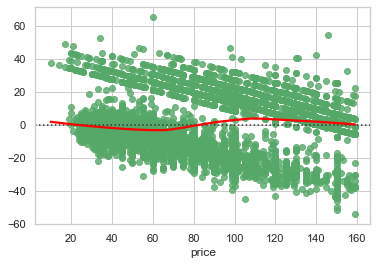

In [36]:
sns.residplot( y_poly_test, y_poly_test_pred, lowess=True, color="g", line_kws={"color": "red"});

# Selecting Best Features for Linear Model 

### F Test

In [37]:
X_train.shape

(27713, 103)

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7fb257bb64d0>)

In [39]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [40]:
list(selected_columns)

['accommodates',
 'bedrooms',
 'beds',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'host_since_year',
 'dist_diff',
 'Airconditioning',
 'CableTV',
 'Dishwasher',
 'Elevator',
 'Lockonbedroomdoor',
 'Privateentrance',
 'Privatelivingroom',
 'Shampoo',
 'TV',
 'private_room',
 'shared_room',
 'Manhattan',
 'Queens']

In [41]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 26.330737737427555
Testing Root Mean Squared Error: 26.098703874094294


In [42]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  26.095852534080738 
 KBest:    26.098703874094294 



### Recursive Feature Elimination

In [43]:
from sklearn.feature_selection import RFECV

In [44]:
ols = linear_model.LinearRegression()

In [45]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.


RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [46]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [47]:
list(selected_rfe)

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'facebook',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Airconditioning',
 'BBQgrill',
 'Bathtub',
 'Beachfront',
 'Bedlinens',
 'Breakfast',
 'CableTV',
 'Changingtable',
 'Cookingbasics',
 'Crib',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'Essentials',
 'Extrapillowsandblankets',
 'Fireextinguisher',
 'Fireplaceguards',
 'Firstaidkit',
 'Freeparkingonpremises',
 'Freestreetpa

In [48]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 25.417889917556316
Testing Root Mean Squared Error: 25.307505621039958


In [49]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  26.095852534080738 
 KBest:    26.098703874094294 
 RFE:      25.307505621039958


### Embredded Method: Lasso

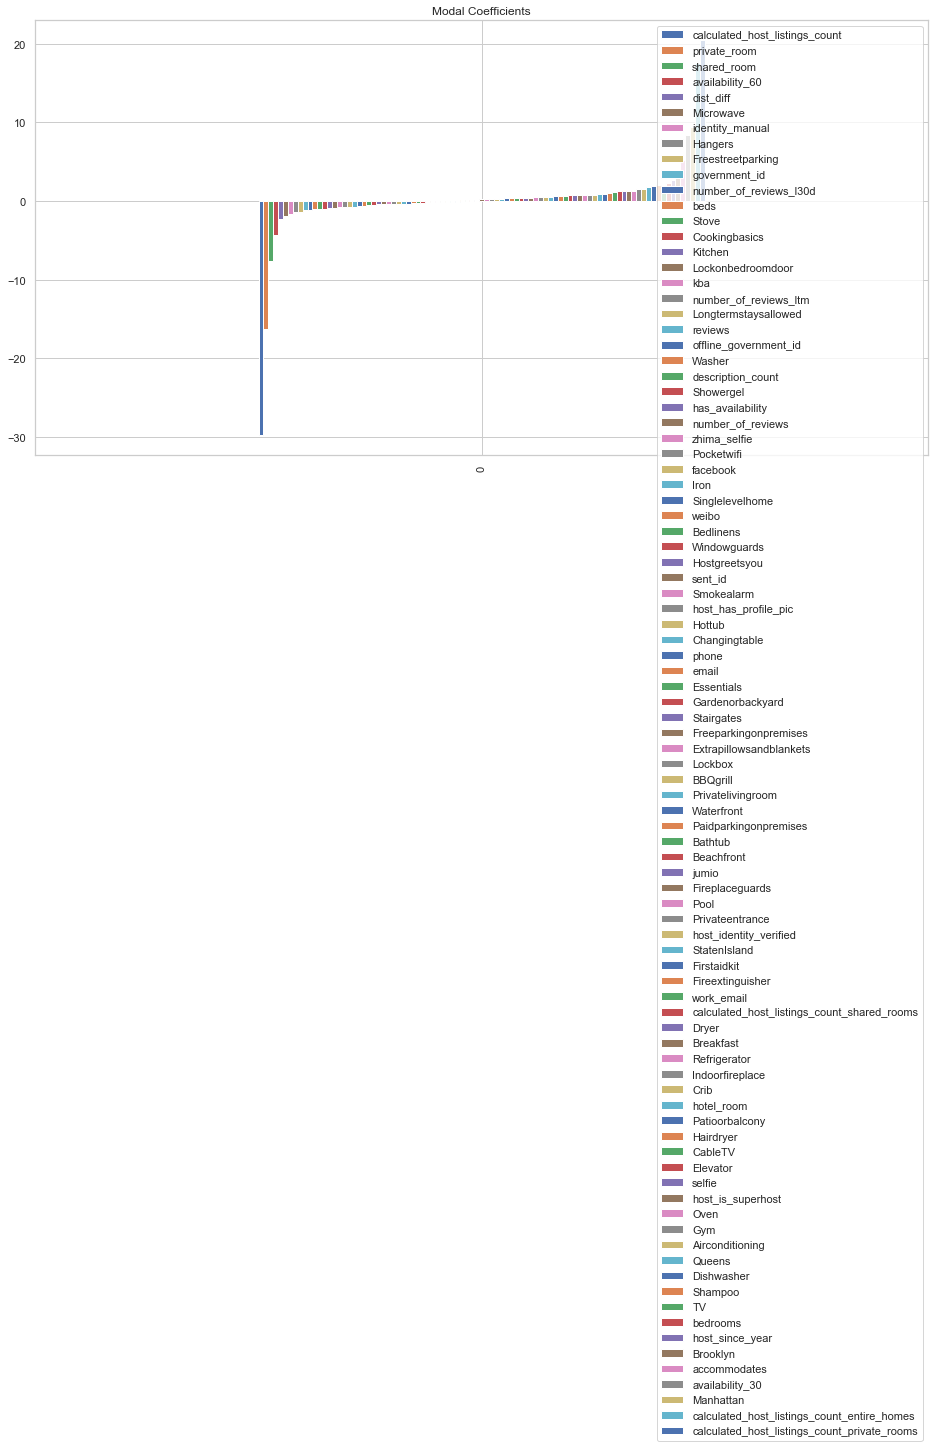

In [50]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8),)

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5, normalize=False)

lasso.fit(X_train,y_train)

y_train_lasso01 = lasso.predict(X_train)
y_test_lasso01 = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_lasso01)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_lasso01))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 20.562149273817784
Testing Error: 25.622307219892566


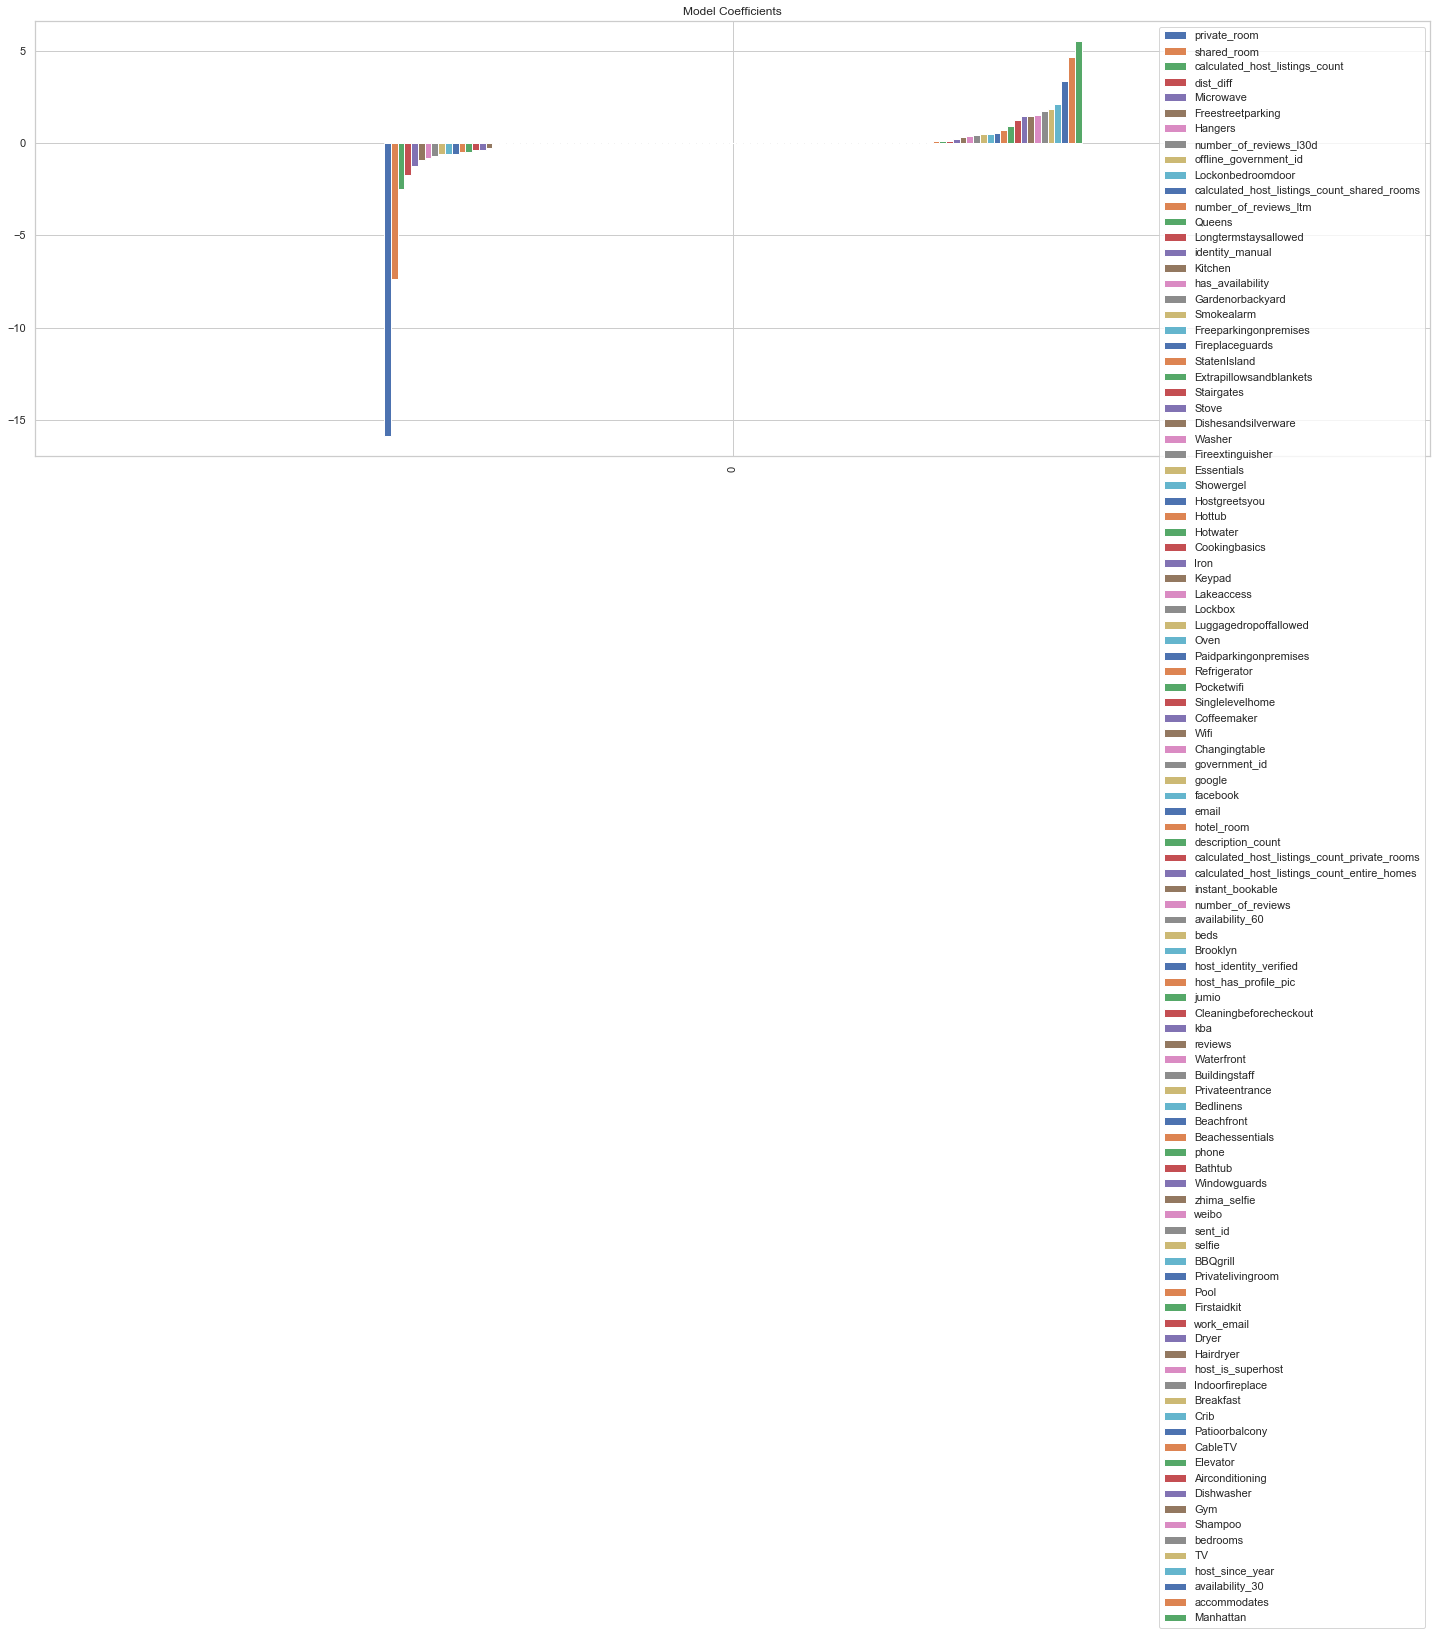

In [52]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=True, figsize=(25,8))

In [53]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    64
dtype: int64

In [54]:
## lassoCV
### modeling normal linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dropped_df[features], dropped_df['log_price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

from sklearn.preprocessing import StandardScaler


#### selecting helpful columns



scaler_normal = StandardScaler()
#print(X_train.shape, y_train.shape)

# fit the scaler to the training data
scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values

#transform the training data
X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=dropped_df[features].columns)


#transform the testing data
X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=dropped_df[features].columns)
# print(X_train.shape, X_test.shape)

from sklearn.linear_model import LassoCV
lm_norm = LassoCV(cv=5,random_state=40)

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)

# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))
test_lassocv_rmse = test_norm_rmse

Training set - Features:  (27713, 103) Target:  (27713,)
Training set - Features:  (6929, 103) Target:  (6929,)
Training Root Mean Squared Error: 26.242828272026628
Test Root Mean Squared Error: 26.071255694597163
R-SQUARED: (train) 0.4912328184174945 (test) 0.4924536892579856


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.866067880961509, tolerance: 0.5743809415783493
  positive)


In [55]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.1: \t",  test_rmse_lasso01, '\n',
      "lassoCV:  \t", test_lassocv_rmse, '\n',
      "poly_rmse:  \t", test_poly_rmse 
     )

Original: 	 26.095852534080738 
 KBest: 	 26.098703874094294 
 RFE: 	 	 25.307505621039958 
 Lasso 0.1: 	 25.622307219892566 
 lassoCV:  	 26.071255694597163 
 poly_rmse:  	 29.318635357197227


In [56]:
## predicting off of the dataset

In [57]:
y_train_pred = lm_norm.predict(df[features])
y_train_pred
train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(df['log_price']), np.exp(y_train_pred)))
train_norm_rmse

## cant predict when house prices are high

167.85872959718242

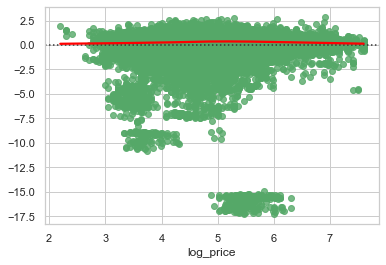

In [58]:
sns.residplot(df['log_price'], y_train_pred,lowess=True, color="g", line_kws={"color": "red"})

In [59]:
# this is saying.. amir what is it saying
# we cant see the green line so its hard
# on average, i am predicting too high
# trained the model on low value so on average im gonna predict low
# our model will less likely predict a house over $167 because it has never seen the higher values.
# we know on average we are not gonna predict this.